In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Task 1
Load bank-et1.csv into a Pandas dataframe. 

In [41]:
df = pd.read_csv('./bank_et1.csv')

Examine the first few data rows and the last few data rows. Identify an attribute that can be the target/dependable variable for 2-class classification. Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below).

In [42]:
# Print first 10 rows of the dataframe
df.head(10)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,5,46,self-employed,divorced,tertiary,no,926,0.233619,0.922197,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,6,34,blue-collar,married,secondary,no,1924,0.022648,0.724227,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,7,45,services,divorced,secondary,no,396,-0.724889,-0.998605,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,8,58,management,divorced,tertiary,no,315,0.502131,-0.045391,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,9,49,management,divorced,tertiary,no,20727,1.331625,-0.420830,no,no,cellular,1,apr,285,3,132,2,failure,no


In [43]:
df.drop(columns='Unnamed: 0', inplace=True)

In [44]:
# Print first 10 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


 Identify an attribute that can be the target/dependable variable for 2-class classification?

After examining the data, we can see that the features: default, housing, loan, contact and subscribed has 2 classes.
The unknown in this case is if the user subscribed to the loan after being contacted by the bank loan department. 
The attribute which can be the target/dependable variable for 2-class classification is subscribed which has 2 outcomes: yes or no.

In [45]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [46]:
nunique = df.nunique()
nunique

age               68
job               11
marital            3
education          3
default            2
balance         1274
ratio_bal_ln    2000
ratio_ln_inc    2000
housing            2
loan               2
contact            2
day               31
month             12
duration         655
campaign          11
pdays            363
previous          26
poutcome           3
subscribed         2
dtype: int64

##### Task 2
 The attribute that can be the target/dependable varibale for 2-class classifictation is "subscribed" which means whether the customer is subscribed for term deposit. This would allow bank to market the product to new customers based for term deposit products

In [47]:
df.isnull().sum()

age               0
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [48]:
df['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [49]:
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

In [50]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

##### Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes

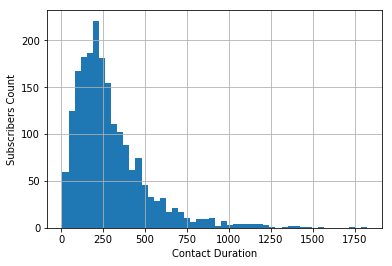

In [51]:
df['duration'].hist(bins=50)
plt.xlabel('Contact Duration')
plt.ylabel('Subscribers Count')
plt.show()

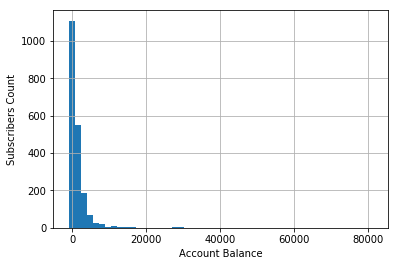

In [52]:
df['balance'].hist(bins=50)
plt.xlabel('Account Balance')
plt.ylabel('Subscribers Count')
plt.show()

#### In the histogram above, we observe that there are few extreme values of balance.

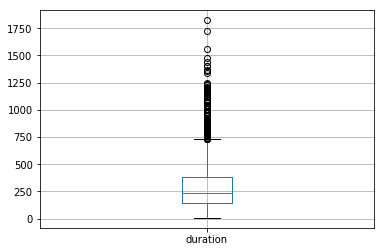

In [53]:
df.boxplot(column='duration')

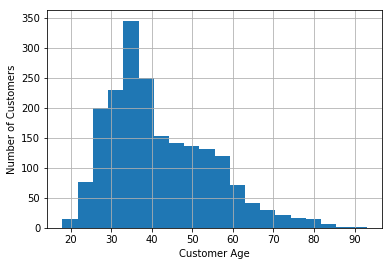

In [58]:
df['age'].hist(bins=20)
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.show()